# **Divvy Bikeshare Analysis - Version 2**

Data Source: https://divvy-tripdata.s3.amazonaws.com/index.html (License - https://divvybikes.com/data-license-agreement)

Run on Python 3.11.5 | No errors | No warnings

In [1]:
# -----------------------
# Step 0: Import packages
# ----------------------- 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# for displaying and modifying the working directory
import os as os

In [2]:
# ------------------------------------------------
# Step 1: Load datasets into dataframes and verify
# ------------------------------------------------

# Tell python where to find the datasets and load them to dataframes
os.chdir(r'D:\OneDrive\Documents\Capstone\CSV') # absolute path, using \ and r prefix
df072022 = pd.read_csv("202207-divvy-tripdata.csv")
df082022 = pd.read_csv("202208-divvy-tripdata.csv")
df092022 = pd.read_csv("202209-divvy-tripdata.csv")
df002022 = pd.read_csv("202210-divvy-tripdata.csv")
df012022 = pd.read_csv("202211-divvy-tripdata.csv")
df022022 = pd.read_csv("202212-divvy-tripdata.csv")
df012023 = pd.read_csv("202301-divvy-tripdata.csv")
df022023 = pd.read_csv("202302-divvy-tripdata.csv")
df032023 = pd.read_csv("202303-divvy-tripdata.csv")
df042023 = pd.read_csv("202304-divvy-tripdata.csv")
df052023 = pd.read_csv("202305-divvy-tripdata.csv")
df062023 = pd.read_csv("202306-divvy-tripdata.csv")

# Combine the 12 monthly dataframes into a single dataframe
frames = [df072022, df082022, df092022, df002022, df012022, df022022, df012023, df022023, df032023, df042023, df052023, df062023]
df0 = pd.concat(frames)
display(df0)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
719613,D7BBF4BCBB72DA32,classic_bike,2023-06-30 12:58:56,2023-06-30 13:41:25,Fairbanks Ct & Grand Ave,TA1305000003,California Ave & Milwaukee Ave,13084,41.891847,-87.620580,41.922695,-87.697153,casual
719614,9A1685F9A39646CA,electric_bike,2023-06-29 19:56:44,2023-06-29 20:09:15,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891970,-87.620198,41.890000,-87.610000,casual
719615,CD4CC5A60881C7AF,electric_bike,2023-06-25 00:27:20,2023-06-25 00:39:09,Clark St & Lincoln Ave,13179,NaN,NaN,41.915745,-87.634604,41.920000,-87.650000,casual
719616,FF6594685CFE2056,electric_bike,2023-06-24 21:26:57,2023-06-24 21:28:44,Fairbanks Ct & Grand Ave,TA1305000003,NaN,NaN,41.891725,-87.620607,41.890000,-87.620000,casual


In [3]:
# Display the first 5 rows of the combined dataframe (df0)
df0.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member


In [4]:
# ------------------------------------------------------------
# Step 2: Initial Exploratory Data Analysis (EDA) and Cleaning
# ------------------------------------------------------------

# Display basic information about the data 
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5779444 entries, 0 to 719617
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 617.3+ MB


We're starting with 5.7 million records.

In [5]:
# Display descriptive statistics about the data 
df0.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.779444e+06,5.779444e+06,5.773649e+06,5.773649e+06
mean,4.190288e+01,-8.764770e+01,4.190308e+01,-8.764773e+01
std,4.550209e-02,2.820109e-02,7.158682e-02,1.187780e-01
min,4.164000e+01,-8.787000e+01,0.000000e+00,-8.816000e+01
25%,4.188103e+01,-8.766129e+01,4.188103e+01,-8.766150e+01
50%,4.190000e+01,-8.764414e+01,4.190000e+01,-8.764434e+01
75%,4.193000e+01,-8.763000e+01,4.193000e+01,-8.763000e+01
max,4.207000e+01,-8.752000e+01,4.237000e+01,0.000000e+00


The negative numbers are okay as these are values for west (negative) longitude.

In [6]:
# Check for duplicates
df0.duplicated().sum()

0

There are no duplicated rows.

In [7]:
# Check for N/A values
df0.isna().sum() 

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    857860
start_station_id      857992
end_station_name      915655
end_station_id        915796
start_lat                  0
start_lng                  0
end_lat                 5795
end_lng                 5795
member_casual              0
dtype: int64

There are a large number of missing values that we'll drop before analyzing and visualizing the data.

In [8]:
# Drop the N/A values
df0.dropna(inplace=True)

In [9]:
# Verify the N/A values have been removed
df0.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [10]:
# Convert started_at and ended_at to datetime format and calculate ride length in minutes 
df0['start'] = pd.to_datetime(df0['started_at'])
df0['end'] = pd.to_datetime(df0['ended_at'])
df0['ride_length'] = round((df0['end'] - df0['start']).dt.total_seconds() / 60)

In [11]:
# Display descriptive statistics with ride_length column added
df0.describe()

,start_lat,start_lng,end_lat,end_lng,start,end,ride_length
count,4.409089e+06,4.409089e+06,4.409089e+06,4.409089e+06,4409089,4409089,4.409089e+06
mean,4.190152e+01,-8.764503e+01,4.190178e+01,-8.764509e+01,2022-12-12 14:37:50.393440512,2022-12-12 14:53:53.470569728,1.604984e+01
min,4.164850e+01,-8.784402e+01,0.000000e+00,-8.784406e+01,2022-07-01 00:00:01,2022-07-01 00:06:23,-1.690000e+02
25%,4.188096e+01,-8.765838e+01,4.188103e+01,-8.765862e+01,2022-08-24 14:46:20,2022-08-24 15:03:24,6.000000e+00
50%,4.189673e+01,-8.764195e+01,4.189694e+01,-8.764288e+01,2022-11-01 15:50:55,2022-11-01 16:05:21,1.000000e+01
75%,4.192875e+01,-8.762872e+01,4.192889e+01,-8.762915e+01,2023-04-20 11:49:22,2023-04-20 12:01:18,1.800000e+01
max,4.206486e+01,-8.752823e+01,4.206485e+01,0.000000e+00,2023-06-30 23:59:45,2023-07-01 18:26:01,3.203500e+04
std,4.283842e-02,2.503981e-02,7.636768e-02,1.343799e-01,NaN,NaN,3.697813e+01


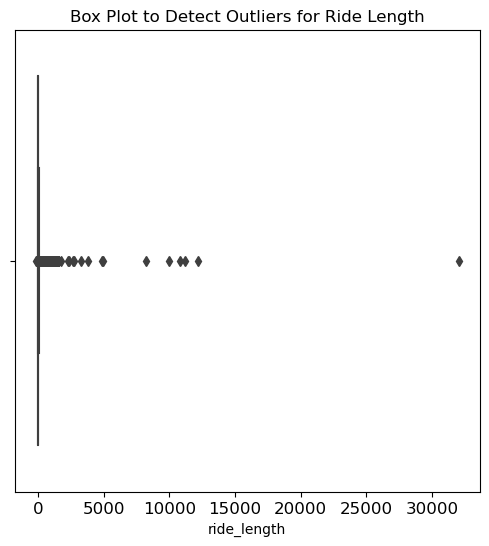

In [12]:
# Create a boxplot of the distribution of `ride_length` to check for outliers
plt.figure(figsize=(6,6))
plt.title('Box Plot to Detect Outliers for Ride Length', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['ride_length'])
plt.show()

There are outliers for ride length that we'll need to deal with.

In [13]:
# Determine outlier values for ride_length

# Calculate the 25th percentile
percentile25 = df0['ride_length'].quantile(0.25)
print("25th percentile:", percentile25)

# Calculate the 75th percentile
percentile75 = df0['ride_length'].quantile(0.75)
print("75th percentile:", percentile75)

# Calculate the interquartile range
iqr = percentile75 - percentile25
print("IQR:", iqr)

# Define the upper limit and lower limit for non-outlier values
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outlier values for `ride_length`
outliers = df0[(df0['ride_length'] > upper_limit) | (df0['ride_length'] < lower_limit)]

# Count the number of rows with outliers
print("Number of rows with outliers for `ride_length`:", len(outliers))

25th percentile: 6.0
75th percentile: 18.0
IQR: 12.0
Lower limit: -12.0
Upper limit: 36.0
Number of rows with outliers for `ride_length`: 324627


The lower limit is -12.0, which we can't use for a ride time. So we'll set the minimum ride time to 5 minutes instead of zero to eliminate any other ride times that might skew the results.

In [14]:
# Drop ride times less than 5 minutes or greater than the calculated upper limit
df0 = df0.drop(df0[df0['ride_length'] < 5 ].index)
df0 = df0.drop(df0[df0['ride_length'] > upper_limit].index)

In [15]:
# Display the first 5 rows of the updated dataframe
df0.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start,end,ride_length
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,2022-07-03 13:58:49,2022-07-03 14:06:32,8.0
7,315FEBB7B3F6D2EA,classic_bike,2022-07-28 20:38:18,2022-07-28 21:09:11,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,casual,2022-07-28 20:38:18,2022-07-28 21:09:11,31.0
8,EE3C4A1E66766B56,classic_bike,2022-07-10 22:55:59,2022-07-10 23:01:32,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,member,2022-07-10 22:55:59,2022-07-10 23:01:32,6.0
15,AE39BB870B51EEBE,electric_bike,2022-07-24 14:34:16,2022-07-24 14:41:26,Wentworth Ave & 33rd St,15445,Wabash Ave & Cermak Rd,TA1305000001,41.834533,-87.631829,41.852619,-87.626488,member,2022-07-24 14:34:16,2022-07-24 14:41:26,7.0
22,35A5F7623C54CB4A,electric_bike,2022-07-22 21:22:10,2022-07-22 21:32:05,Lincoln Ave & Fullerton Ave,TA1309000058,Clark St & Newport St,632,41.924204,-87.646522,41.944540,-87.654678,member,2022-07-22 21:22:10,2022-07-22 21:32:05,10.0


In [16]:
# Display basic information about the dataframe (df0)
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795969 entries, 2 to 719590
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             795969 non-null  object        
 1   rideable_type       795969 non-null  object        
 2   started_at          795969 non-null  object        
 3   ended_at            795969 non-null  object        
 4   start_station_name  795969 non-null  object        
 5   start_station_id    795969 non-null  object        
 6   end_station_name    795969 non-null  object        
 7   end_station_id      795969 non-null  object        
 8   start_lat           795969 non-null  float64       
 9   start_lng           795969 non-null  float64       
 10  end_lat             795969 non-null  float64       
 11  end_lng             795969 non-null  float64       
 12  member_casual       795969 non-null  object        
 13  start               795969 non-nul

Through the analysis and cleaning process, we got the record count down to just under 796,000 from the original 7.7 million.

In [17]:
# Display descriptive statistics showing ride length after cleaning
df0.describe()

,start_lat,start_lng,end_lat,end_lng,start,end,ride_length
count,795969.000000,795969.000000,795969.000000,795969.000000,795969,795969,795969.000000
mean,41.903759,-87.645849,41.904090,-87.645916,2022-11-15 17:54:48.861115392,2022-11-15 18:08:26.807157248,13.638781
min,41.648501,-87.841116,0.000000,-87.841110,2022-07-01 00:00:01,2022-07-01 00:07:34,5.000000
25%,41.882134,-87.658723,41.882242,-87.658751,2022-08-06 16:27:38,2022-08-06 16:42:59,8.000000
50%,41.899001,-87.643118,41.899643,-87.643500,2022-09-16 06:07:43,2022-09-16 06:18:19,11.000000
75%,41.929143,-87.629726,41.929143,-87.629634,2023-04-14 19:17:49,2023-04-14 19:33:18,18.000000
max,42.064854,-87.528232,42.064854,0.000000,2023-06-30 23:59:34,2023-07-01 00:17:33,36.000000
std,0.040193,0.024359,0.061914,0.101250,NaN,NaN,7.601146


The min, max, mean and statndard deviation for ride_length are all reasonable.

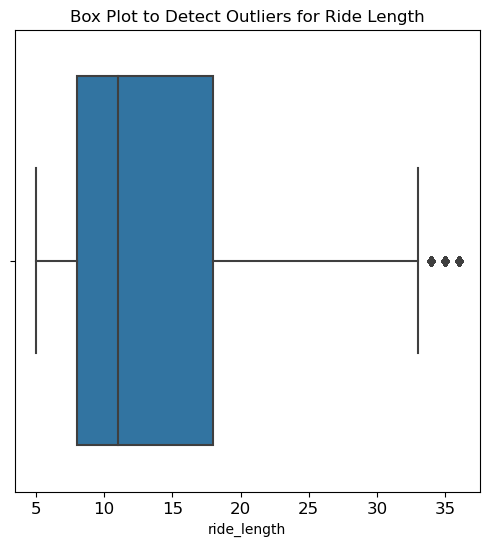

In [18]:
# Create a boxplot of the distribution of `ride_length` to check for outliers
plt.figure(figsize=(6,6))
plt.title('Box Plot to Detect Outliers for Ride Length', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['ride_length'])
plt.show()

The shows that we're working with much cleaner and more balanced data.

In [19]:
# Add a column for the date
df0['date'] = pd.to_datetime(df0['started_at']).dt.date

# Add a column for the day
df0['day'] = pd.to_datetime(df0['date']).dt.strftime('%d')

# Add a column for the year
df0['year'] = pd.to_datetime(df0['date']).dt.strftime('%Y')

# Add a column for the month
df0['month'] = pd.to_datetime(df0['date']).dt.strftime('%m')

# Add a column for the weekday
df0['day_of_week'] = pd.to_datetime(df0['date']).dt.strftime('%a')

# Add a column for the hour
df0['hour'] = pd.to_datetime(df0['started_at']).dt.strftime('%H')

# Create a column for season
df0["season"] = df0["month"].map({
    "03": "Spring",
    "04": "Spring",
    "05": "Spring",
    "06": "Summer",
    "07": "Summer",
    "08": "Summer",
    "09": "Fall",
    "10": "Fall",
    "11": "Fall",
    "12": "Winter",
    "01": "Winter",
    "02": "Winter"
})

# Create a column for time of day
df0['time_of_day'] = df0['hour'].map({
    "00": "Night",
    "01": "Night",
    "02": "Night",
    "03": "Night",
    "04": "Night",
    "05": "Night",
    "06": "Morning",
    "07": "Morning",
    "08": "Morning",
    "09": "Morning",
    "10": "Morning",
    "11": "Morning",
    "12": "Afternoon",
    "13": "Afternoon",
    "14": "Afternoon",
    "15": "Afternoon",
    "16": "Afternoon",
    "17": "Afternoon",
    "18": "Evening",
    "19": "Evening",
    "20": "Evening",
    "21": "Evening",
    "22": "Evening",
    "23": "Evening"	
})

In [20]:
# Display first 5 rows with new columns added
df0.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start,end,ride_length,date,day,year,month,day_of_week,hour,season,time_of_day
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual,2022-07-03 13:58:49,2022-07-03 14:06:32,8.0,2022-07-03,03,2022,07,Sun,13,Summer,Afternoon
7,315FEBB7B3F6D2EA,classic_bike,2022-07-28 20:38:18,2022-07-28 21:09:11,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,casual,2022-07-28 20:38:18,2022-07-28 21:09:11,31.0,2022-07-28,28,2022,07,Thu,20,Summer,Evening
8,EE3C4A1E66766B56,classic_bike,2022-07-10 22:55:59,2022-07-10 23:01:32,Wabash Ave & Grand Ave,TA1307000117,Dearborn Pkwy & Delaware Pl,TA1307000128,41.891466,-87.626761,41.898969,-87.629912,member,2022-07-10 22:55:59,2022-07-10 23:01:32,6.0,2022-07-10,10,2022,07,Sun,22,Summer,Evening
15,AE39BB870B51EEBE,electric_bike,2022-07-24 14:34:16,2022-07-24 14:41:26,Wentworth Ave & 33rd St,15445,Wabash Ave & Cermak Rd,TA1305000001,41.834533,-87.631829,41.852619,-87.626488,member,2022-07-24 14:34:16,2022-07-24 14:41:26,7.0,2022-07-24,24,2022,07,Sun,14,Summer,Afternoon
22,35A5F7623C54CB4A,electric_bike,2022-07-22 21:22:10,2022-07-22 21:32:05,Lincoln Ave & Fullerton Ave,TA1309000058,Clark St & Newport St,632,41.924204,-87.646522,41.944540,-87.654678,member,2022-07-22 21:22:10,2022-07-22 21:32:05,10.0,2022-07-22,22,2022,07,Fri,21,Summer,Evening


In [21]:
# Display descriptive statistics with ride_length added and cleaned
df0.describe()

,start_lat,start_lng,end_lat,end_lng,start,end,ride_length
count,795969.000000,795969.000000,795969.000000,795969.000000,795969,795969,795969.000000
mean,41.903759,-87.645849,41.904090,-87.645916,2022-11-15 17:54:48.861115392,2022-11-15 18:08:26.807157248,13.638781
min,41.648501,-87.841116,0.000000,-87.841110,2022-07-01 00:00:01,2022-07-01 00:07:34,5.000000
25%,41.882134,-87.658723,41.882242,-87.658751,2022-08-06 16:27:38,2022-08-06 16:42:59,8.000000
50%,41.899001,-87.643118,41.899643,-87.643500,2022-09-16 06:07:43,2022-09-16 06:18:19,11.000000
75%,41.929143,-87.629726,41.929143,-87.629634,2023-04-14 19:17:49,2023-04-14 19:33:18,18.000000
max,42.064854,-87.528232,42.064854,0.000000,2023-06-30 23:59:34,2023-07-01 00:17:33,36.000000
std,0.040193,0.024359,0.061914,0.101250,NaN,NaN,7.601146


In [22]:
# Display basic info for the cleaned data
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795969 entries, 2 to 719590
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             795969 non-null  object        
 1   rideable_type       795969 non-null  object        
 2   started_at          795969 non-null  object        
 3   ended_at            795969 non-null  object        
 4   start_station_name  795969 non-null  object        
 5   start_station_id    795969 non-null  object        
 6   end_station_name    795969 non-null  object        
 7   end_station_id      795969 non-null  object        
 8   start_lat           795969 non-null  float64       
 9   start_lng           795969 non-null  float64       
 10  end_lat             795969 non-null  float64       
 11  end_lng             795969 non-null  float64       
 12  member_casual       795969 non-null  object        
 13  start               795969 non-nul

[Text(0.5, 1.0, 'Average Ride Length by Day')]

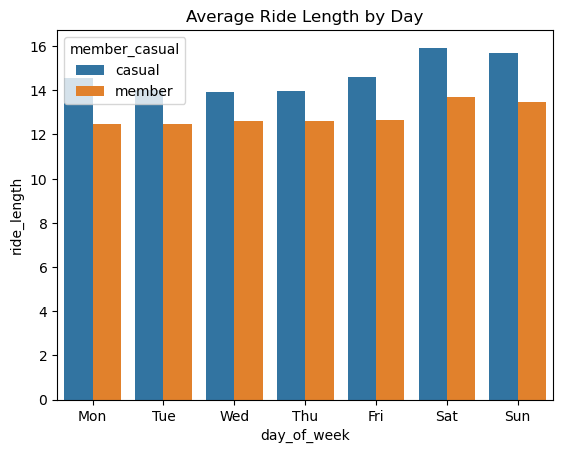

In [23]:
# Display a bar plot of average ride length by day of week

grouped_data = df0.groupby(['member_casual', 'day_of_week']).agg({'ride_length': 'mean'}).reset_index()
grouped_data = grouped_data.sort_values(['member_casual', 'day_of_week'])
sns.barplot(x='day_of_week', y='ride_length', hue='member_casual', data=grouped_data, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dodge=True).set(title='Average Ride Length by Day')

[Text(0.5, 1.0, 'Total Rides by Day')]

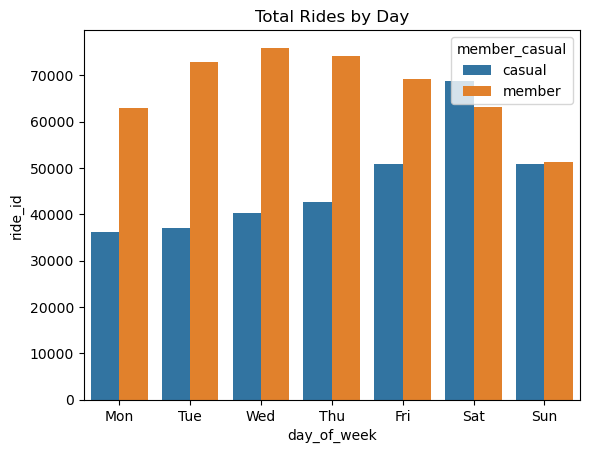

In [24]:
# Display a bar plot of total rides by day of week
grouped_data = df0.groupby(['member_casual', 'day_of_week']).agg({'ride_id': 'count'}).reset_index()
grouped_data = grouped_data.sort_values(['member_casual', 'day_of_week'])
sns.barplot(x='day_of_week', y='ride_id', hue='member_casual', data=grouped_data, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dodge=True).set(title='Total Rides by Day')

The bar charts look good. They also reveal patterns that we should take a closer look at in Tableau.

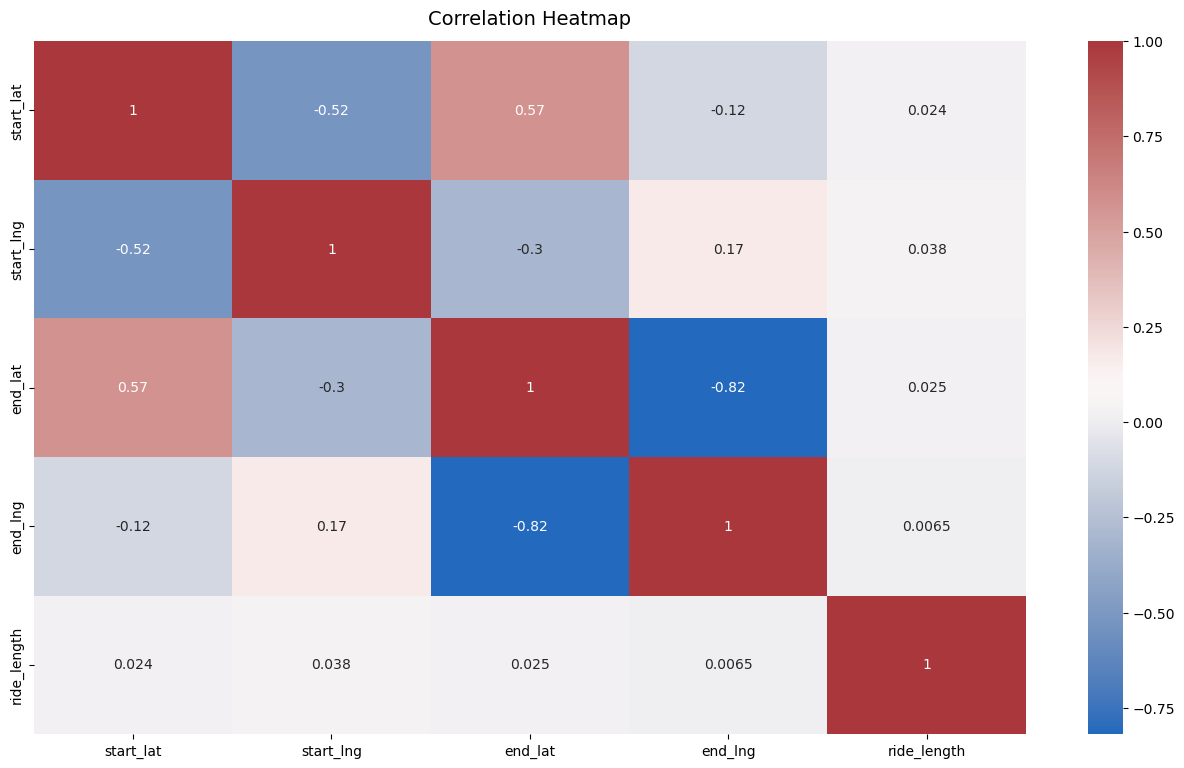

In [25]:
# Display a heatmap of numeric variable correlation
corr = df0.corr(numeric_only = 1)
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(corr, vmin=None, vmax=None, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Latitude and longitude correlate, which is not a surpise. Ride length doesn't correlate well with anything, so there are no new avenues of exploration.

In [26]:
# Save df0 to csv
df0.to_csv('divvy.csv', index=False, encoding='utf-8')